(156581, 18)
Termination criterion satisfied


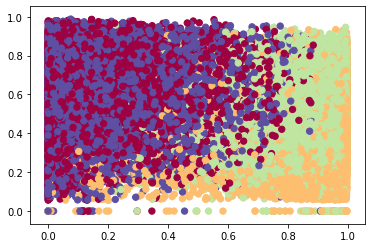

156581


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class KMeansClustering:
    def __init__(self, X, no_clusters):
        self.K = no_clusters
        self.max_iter = 400
        self.plotfigure = True
        self.no_examples = X.shape[0]
        self.no_features = X.shape[1]

    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, self.no_features))

        for k in range(self.K):
            centroid = X[np.random.choice(range(self.no_examples))]
            centroids[k] = centroid

        return centroids

    def create_clusters(self, X, centroids):
        # Will contain a list of the points that are associated with that specific cluster
        clusters = [[] for _ in range(self.K)]

        # Loop through each point and check which is the closest cluster
        for point_idx, point in enumerate(X):
            closest = np.argmin(
                np.sqrt(np.sum((point - centroids) ** 2, axis=1))
            )
            clusters[closest].append(point_idx)

        return clusters

    def calculate_new_centroids(self, clusters, X):
        centroids = np.zeros((self.K, self.no_features))
        for idx, cluster in enumerate(clusters):
            new_centroid = np.mean(X[cluster], axis=0)
            centroids[idx] = new_centroid

        return centroids

    def predict_cluster(self, clusters, X):
        y_pred = np.zeros(self.no_examples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx

        return y_pred

    def plot_fig(self, X, y):
        plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
        plt.show()

    def fit(self, X):
        centroids = self.initialize_random_centroids(X)
        for it in range(self.max_iter):
            clusters = self.create_clusters(X, centroids)

            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X)

            diff = centroids - previous_centroids

            if not diff.any():
                print("Termination criterion satisfied")
                break

        # Get label predictions
        y_pred = self.predict_cluster(clusters, X)

        if self.plotfigure:
            self.plot_fig(X, y_pred)

        return y_pred


no_clusters = 4
df = pd.read_csv("onewayoranother2.csv")
df = df.drop(['userid','playcount'],axis=1)
df = df.drop_duplicates(subset="name")
df =  df.reset_index()
print(df.shape)
newdf = df
newdf = newdf[["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence","popularity",'year','key']]
X = np.array([newdf['year'],newdf['popularity'],newdf['key']])
X[0] = (X[0]-1920)/100
X[1] = X[1]/100
X[2] = X[2]/11
newdf = newdf.drop(['year','popularity','key'],axis=1)
newdf.insert(8, "key", X[2])
newdf.insert(10, "popularity", X[1])
newdf.insert(9, "year", X[0])
X = np.array(newdf)
Kmeans = KMeansClustering(X, no_clusters)
y_pred = Kmeans.fit(X)
print(len(y_pred))

In [61]:
df.head(1)

,index,Unnamed: 0,acousticness,name,danceability,tempo,loudness,energy,id,instrumentalness,key,liveness,popularity,speechiness,valence,year,artists,genres
0,0,0,0.995,Singende Bataillone 1. Teil Carl Woitschach,0.708,0.002377,-0.002373,0.195,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10.0,0.151,0.0,0.0506,0.779,1928.0,Carl Woitschach,[]


In [62]:
df = df.drop(['index','Unnamed: 0'],axis =1)

In [63]:
df.insert(16,'cluster_no',y_pred)
newdf.insert(11, 'cluster_no', y_pred)

In [64]:
cluster = list()
clusterdf = list()
for i in range(0,4):
    cluster.append(newdf[newdf['cluster_no'] == i])
    clusterdf.append(df[df['cluster_no'] == i])

Termination criterion satisfied


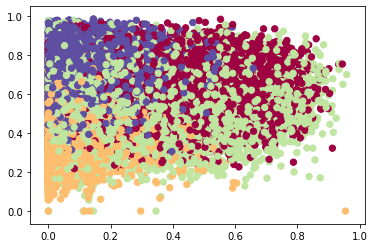

Termination criterion satisfied


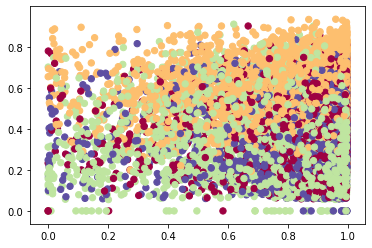

Termination criterion satisfied


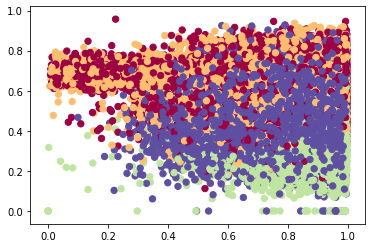

Termination criterion satisfied


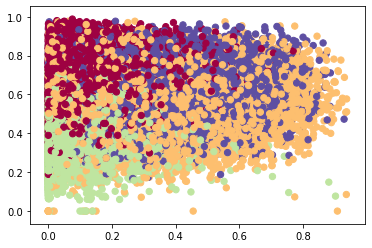

In [65]:
y_pred = list()
for i in range(0,4):
    Kmeans = KMeansClustering(np.array(cluster[i]), 4)
    y_pred.append(Kmeans.fit(np.array(cluster[i])))
    clusterdf[i].insert(12,'sub_cluster', y_pred[i])

In [67]:
clusterdf[3][clusterdf[3]['sub_cluster']==0]

,acousticness,name,danceability,tempo,loudness,energy,id,instrumentalness,key,liveness,popularity,speechiness,sub_cluster,valence,year,artists,genres,cluster_no
3815,0.07570,Lay Back in the Arms of Someone Smokie,0.594,0.002467,-0.001378,0.750,1r9QBciQVM1BnW72cQUA4R,0.000244,2.0,0.0593,52.0,0.0299,0.0,0.693,1977.0,Smokie,"['gospel', 'gospel r&b']",3.0
3841,0.00391,Lip Service Elvis Costello & The Attractions,0.544,0.003021,-0.000920,0.916,2iICM2WTVmKasZWpMItYdn,0.001050,4.0,0.2460,31.0,0.0315,0.0,0.903,1978.0,Elvis Costello & The Attractions,"['art rock', 'dance rock', 'folk rock', 'mello...",3.0
3949,0.00220,Dreaming - Remastered Blondie,0.351,0.003240,-0.001029,0.903,2nqUFHREsi4olsi7knIcxJ,0.000056,2.0,0.0624,35.0,0.0402,0.0,0.823,1979.0,Blondie,"['candy pop', 'dance rock', 'new romantic', 'n...",3.0
3988,0.02670,Do the Dog - 2015 Remaster The Specials,0.576,0.002995,-0.001383,0.952,5kinuu5G1kWlVmnZMzwIE2,0.001130,0.0,0.1900,35.0,0.0406,0.0,0.964,1979.0,The Specials,"['dance rock', 'punk', 'ska', 'ska revival']",3.0
4042,0.02000,Where Were You Journey,0.546,0.002890,-0.001397,0.811,5nrgyqDkpzvs9iM9cnycc2,0.000137,2.0,0.0759,29.0,0.0551,0.0,0.641,1980.0,Journey,"['album rock', 'classic rock', 'hard rock', 'm...",3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156564,0.06940,Multiple Flows (with Lil Uzi Vert) Lil Wayne &...,0.877,0.002530,-0.001128,0.554,33NAQaVm6TRv1phc0fPsfb,0.000000,1.0,0.0521,65.0,0.3020,0.0,0.585,2020.0,Lil Wayne,"['hip hop', 'new orleans rap', 'pop rap', 'rap...",3.0
156567,0.19900,Stay Tonight CHUNG HA,0.636,0.002428,-0.000368,0.841,3As0OA5B06BxLfADvYyG8L,0.000395,2.0,0.0836,74.0,0.0548,0.0,0.506,2020.0,CHUNG HA,['k-pop'],3.0
156570,0.49500,Vibes Only Goyard Oz & $IMEON,0.864,0.002750,-0.002223,0.440,6T78uCv6W58xPrNpS6yZZt,0.000000,5.0,0.3200,64.0,0.5530,0.0,0.848,2020.0,Goyard Oz,[],3.0
156574,0.04520,I Dare You Kelly Clarkson,0.655,0.002489,-0.001413,0.719,0o58NWBiVXewJNfNDKQyjw,0.000018,2.0,0.1090,69.0,0.0368,0.0,0.435,2020.0,Kelly Clarkson,"['dance pop', 'neo mellow', 'pop', 'pop rock',...",3.0


In [68]:
newdf1  = pd.concat([clusterdf[0],clusterdf[1],clusterdf[2],clusterdf[3]])

In [69]:
newdf1.to_csv("Kmeansfromscratch.csv")

In [70]:
newdf1.shape

(156581, 18)